### PCA of VIX Term Structure

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

path = 'DATA/' #set path for location of VIX TS

In [2]:
VIX_TS = pd.read_csv(path +'VIX_TS_CUSTOM.csv')

In [3]:
VIX_TS

,Date,VIX_1^2,VIX_2^2,VIX_3^2,VIX_6^2,VIX_9^2,VIX_12^2
0,04/01/1996,0.015131,0.014761,0.014713,0.015302,0.016779,0.017768
1,05/01/1996,0.014720,0.014526,0.014526,0.015532,0.017579,0.018092
2,08/01/1996,0.013886,0.014007,0.014085,0.015012,0.016564,0.017490
3,09/01/1996,0.020184,0.016654,0.016386,0.016412,0.017792,0.018461
4,10/01/1996,0.020782,0.018672,0.018355,0.017348,0.018660,0.019302
...,...,...,...,...,...,...,...
6830,22/02/2023,0.041063,0.040015,0.040393,0.041418,0.042734,0.042612
6831,23/02/2023,0.036753,0.036438,0.037261,0.038810,0.040634,0.040754
6832,24/02/2023,0.039237,0.038966,0.039731,0.041020,0.042417,0.042306
6833,27/02/2023,0.037837,0.036800,0.037844,0.039555,0.041173,0.041178


In [4]:
VIX_TS = pd.read_csv(path +'VIX_TS_CUSTOM.csv')
VIX_TS['Date'] = pd.to_datetime(VIX_TS['Date'],format = '%d/%m/%Y')

print('Date Range:')
print(min(VIX_TS['Date']).date(),'-', max(VIX_TS['Date']).date())

VIX_TS = VIX_TS.rename({'VIX_1^2':'1 month','VIX_2^2':'2 month','VIX_3^2':'3 month','VIX_6^2':'6 month',
               'VIX_9^2':'9 month','VIX_12^2':'12 month'},axis=1)

Date Range:
1996-01-04 - 2023-02-28


In [20]:
DATES = VIX_TS.Date
SLOPE_df = pd.DataFrame(columns = ['Date','SLOPE'])
SLOPE_df['Date'] = DATES

In [19]:
date_train = DATES[DATES < '2000-01-01']
n0_train = len(date_train)

date_sample =  DATES[DATES >= '2000-01-01']
n_samp = len(date_sample)

In [40]:
pca0 = PCA()

X = VIX_TS.iloc[:n0_train,1:7]
pca0.fit(X)

SLOPE = pca0.transform(X)[:,1]
SLOPE = -(SLOPE - np.mean(SLOPE))/np.std(SLOPE)

SLOPE_df.iloc[:n0_train,1] = SLOPE

for idx in range(n0_train,n_samp + n0_train):
    pca = PCA()
    
    X = VIX_TS.iloc[:idx,1:7]
    pca.fit(X)
    
    SLOPE = pca.transform(X)[:,1]
    SLOPE = -(SLOPE - np.mean(SLOPE))/np.std(SLOPE)
    
    SLOPE_df.iloc[idx,1] = SLOPE[-1]

In [43]:
SLOPE_df.to_csv(path+'SLOPE_v1.csv')

Authors data

In [48]:
A_PCA = pd.read_csv(path + 'PCA.csv',skiprows=12)
our_PCA = pd.read_csv(path + 'SLOPE_v1.csv')

our_PCA['Date'] = pd.to_datetime(our_PCA['Date'])

In [49]:
def DATE_STR(num):
    num_str = str(num)
    date_str = num_str[-2:]+'/'+num_str[4:-2]+'/'+num_str[0:4]
    
    return date_str 

SLOPE_df = A_PCA[['Unnamed: 0','PC2']]
SLOPE_df.columns = ['Date','SLOPE']
SLOPE_df['Date'] = SLOPE_df['Date'].apply(DATE_STR)
SLOPE_df['Date'] = pd.to_datetime(SLOPE_df['Date'],format = '%d/%m/%Y')

C:\Users\Camer\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Camer\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [50]:
SLOPE_df = pd.merge(SLOPE_df,our_PCA,on='Date',how='left')

In [51]:
SLOPE_df

,Date,SLOPE_x,Unnamed: 0,SLOPE_y
0,1996-01-04,-0.88016,0,-0.287412
1,1996-01-05,-0.83101,1,-0.211625
2,1996-01-08,-0.85582,2,-0.221444
3,1996-01-09,-1.05163,3,-0.531307
4,1996-01-10,-1.03497,4,-0.550159
...,...,...,...,...
5907,2019-06-24,-0.32745,5907,-0.427290
5908,2019-06-25,-0.36115,5908,-0.439097
5909,2019-06-26,-0.35134,5909,-0.455018
5910,2019-06-27,-0.39096,5910,-0.431591


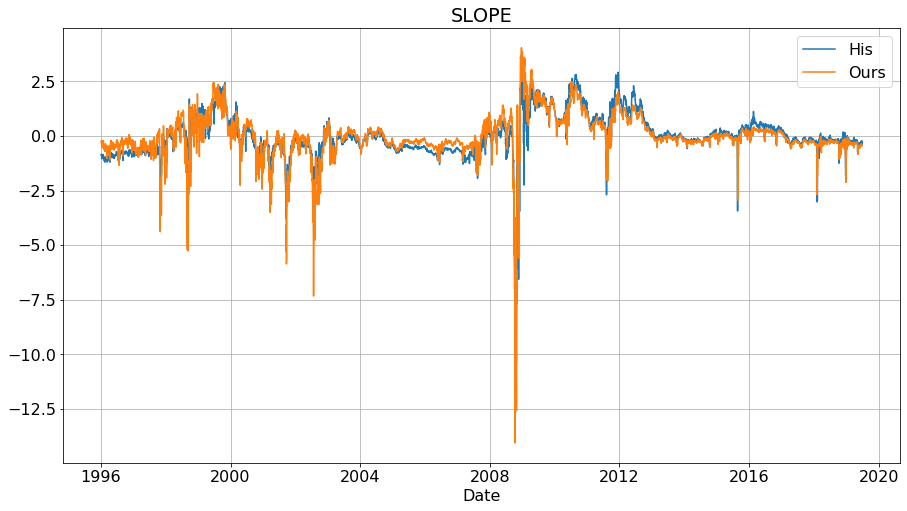

In [54]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

plt.plot(SLOPE_df.Date,SLOPE_df.SLOPE_x,label = 'His')
plt.plot(SLOPE_df.Date,SLOPE_df.SLOPE_y,label = 'Ours')

plt.legend()
plt.ylabel('')
plt.xlabel('Date')
plt.title('SLOPE')
plt.grid()
plt.show()